#Logistic Regression using a linear model Coursework LaGuardia Data Science/Analysis Certification

#Task 1: Define the Problem

Determine if a user cicked on the ad based on the data.

#Task 2a: Install the Needed Libraries

In [ ]:
#!pip

#Task 2b: Import the Needed Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly
import cufflinks as cf

#Task 3: Load the Data

In [ ]:
ad_data = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/advertising.csv')

#Task 4: Perform Data Exploratory Analysis (EDA)

##Show the data

In [ ]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


##Get Data Info

In [ ]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
ad_data.describe

<bound method NDFrame.describe of      Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                             Ad Topic Line            City  Male  \
0       Cloned 5thgen

In [ ]:
ad_data.columns


Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

##Find Missing Values

In [ ]:
ad_data.isnull().sum().sum()

0

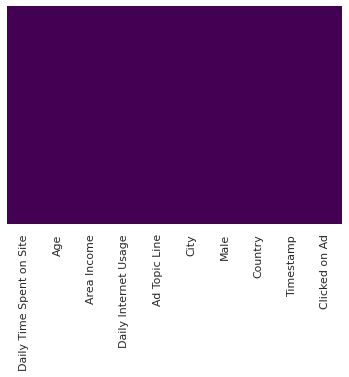

In [ ]:
sns.heatmap(ad_data.isnull(), yticklabels=False,cbar=False,cmap='viridis')

#Task 5: Perform Data Cleaning

In [ ]:
#cleaning up the head data to remove using list comprehension and making it snake_case
ad_data.columns = [x.lower().replace(" ", "_") for x in ad_data.columns]

In [ ]:
ad_data.columns

Index(['daily_time_spent_on_site', 'age', 'area_income',
       'daily_internet_usage', 'ad_topic_line', 'city', 'male', 'country',
       'timestamp', 'clicked_on_ad'],
      dtype='object')

In [ ]:
diu = ad_data['daily_internet_usage']
dtos = ad_data['daily_time_spent_on_site']
income = ad_data['area_income']
clicked = ad_data['clicked_on_ad']
age = ad_data['age']
sex = ad_data['male']
location = ad_data['city'] + [', '] + ad_data['country']

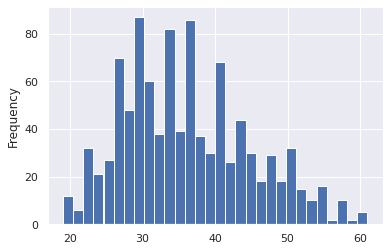

In [ ]:
#there is a little bit of a tail but we need to see yet if there is a need for normalizing
ad_data['age'].plot(kind='hist', bins= 30); # ; cleans up display..gets rid of the output code

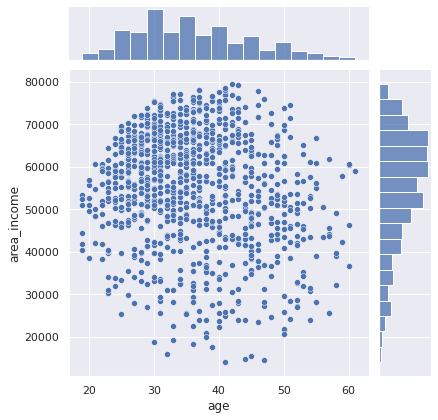

In [ ]:
sns.jointplot(x=age,y=income,data=ad_data);
# there is a little bit of skew in each of them possibly issues of density on where the observations
# to go deeper...use the hex

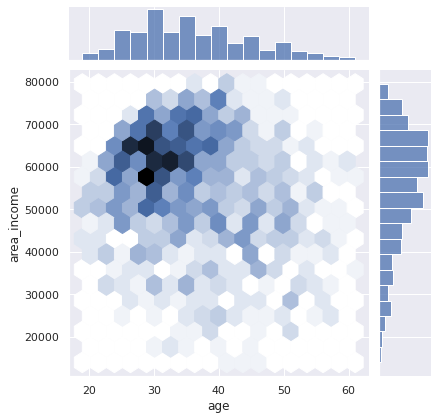

In [ ]:
sns.jointplot(x=age,y=income,kind = "hex",data=ad_data);
# easier to see the bulk of the income is more around 60 to 70 thousand and age is around the 30s

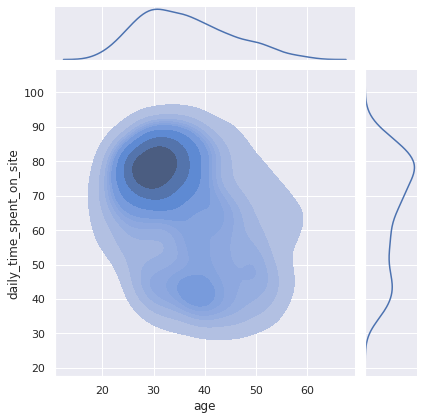

In [ ]:
sns.jointplot(x=age,y=dtos,kind='kde', shade=True, data=ad_data);
#shows where the clusters 

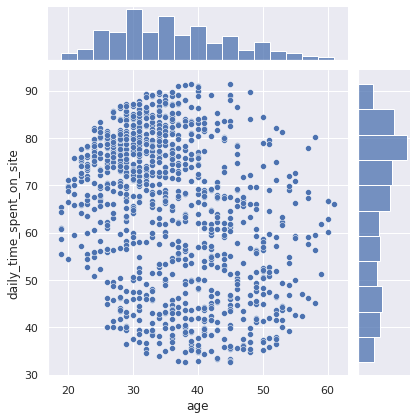

In [ ]:
sns.jointplot(x=age,y=dtos,data=ad_data);
#why is it partitioned here? internet usage by time may be why

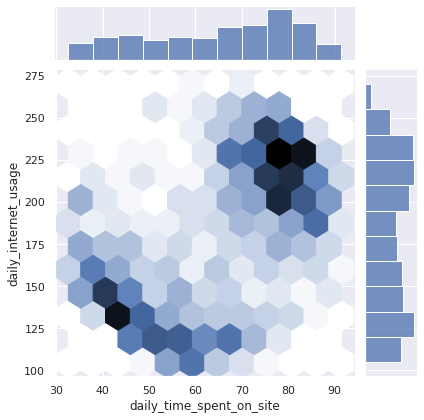

In [ ]:
sns.jointplot(x=dtos,y=diu,kind='hex', data=ad_data);
#why is it partitioned here? internet usage by time may be why

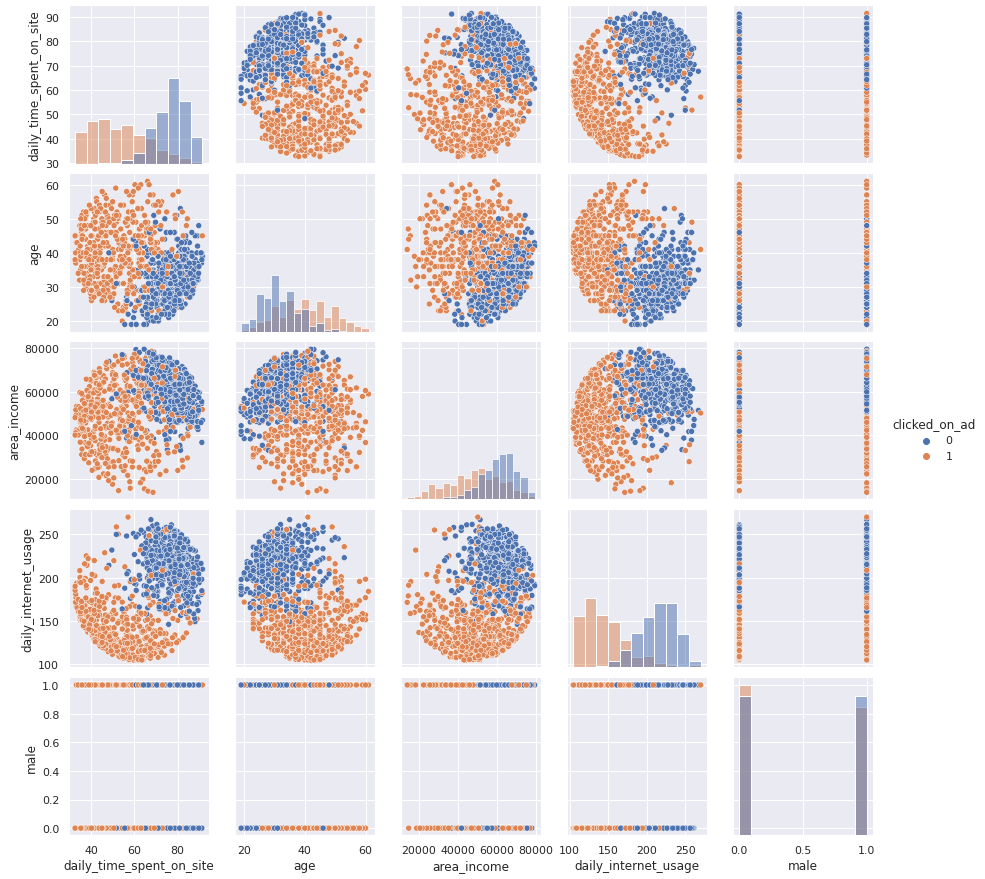

In [ ]:
sns.pairplot(ad_data, hue="clicked_on_ad", diag_kind='hist');
#kde plots most data is split as to how and why it happened.
# because it looks circular (shotgun blasts) there is not a lot of correlation or upward trend 
# the plot to the right side with the bars on each side is because of the binary nature of the data

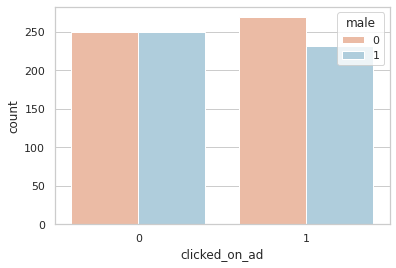

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x=clicked, hue=sex, data=ad_data, palette='RdBu') #color pallette should match female male pattern

less men clicked on the ad than women. 

####https://stats.oarc.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-effect-coding/   
0=female 1=male typically...
* for finding an effective coefficient good to do -1, 1. 
* for display  label legend female / male. 

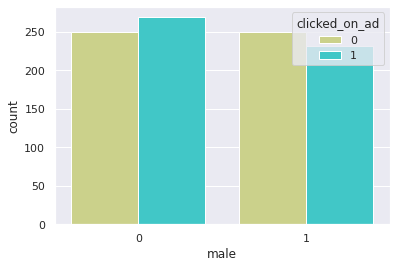

In [ ]:
sns.set()
sns.countplot(x=sex, hue=clicked,data=ad_data, palette='rainbow_r')

Text(0.5, 0, 'age')

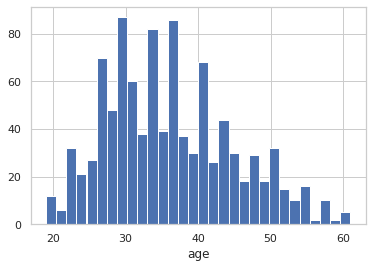

In [ ]:
sns.set_style('whitegrid')
ad_data['age'].hist(bins=30)
plt.xlabel('age')

In [ ]:
# bulk of the data collected was on useres from ages approximatley 27-43 yrs old
ad_data.age.value_counts()

31    60
36    50
28    48
29    48
33    43
35    39
30    39
34    39
32    38
26    37
38    37
37    36
40    36
27    33
41    32
45    30
39    30
25    27
42    26
43    23
44    21
24    21
50    20
23    19
46    18
49    18
48    16
52    15
47    13
22    13
51    12
53    10
54     9
55     7
20     6
21     6
57     6
19     6
60     4
58     4
56     2
59     2
61     1
Name: age, dtype: int64

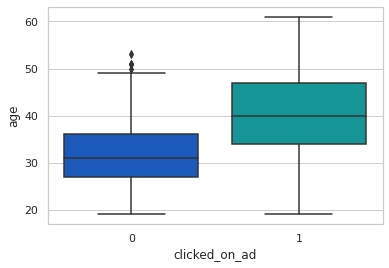

In [ ]:
plt.figure()
sns.boxplot(x=clicked, y=age, data=ad_data, palette='winter')

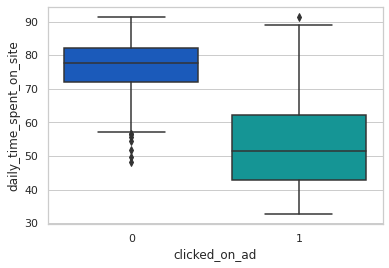

In [ ]:
plt.figure()
sns.boxplot(x=clicked, y=dtos, data=ad_data, palette='winter')

In [ ]:
print(location) #exploration to see if there is any relevant relations 
#possible analysis on location and reach. 

0                     Wrightburgh, Tunisia
1                         West Jodi, Nauru
2                     Davidton, San Marino
3                    West Terrifurt, Italy
4                    South Manuel, Iceland
                      ...                 
995                     Duffystad, Lebanon
996    New Darlene, Bosnia and Herzegovina
997                South Jessica, Mongolia
998                 West Steven, Guatemala
999                    Ronniemouth, Brazil
Length: 1000, dtype: object


####Converting to date time for future analysis of when ads had more reach.

In [ ]:
#check min max dates for future analysis
min_date = min(ad_data['timestamp'])
max_date = max(ad_data['timestamp'])
print('Date range: ', min_date, ' - ', max_date)

Date range:  2016-01-01 02:52:10  -  2016-07-24 00:22:16


In [ ]:
ad_data['timestamp'] = pd.to_datetime(ad_data['timestamp'])

In [ ]:
ad_data.head()

,daily_time_spent_on_site,age,area_income,daily_internet_usage,ad_topic_line,city,male,country,timestamp,clicked_on_ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


#Task 6: Visualize Cleaned up Dataset

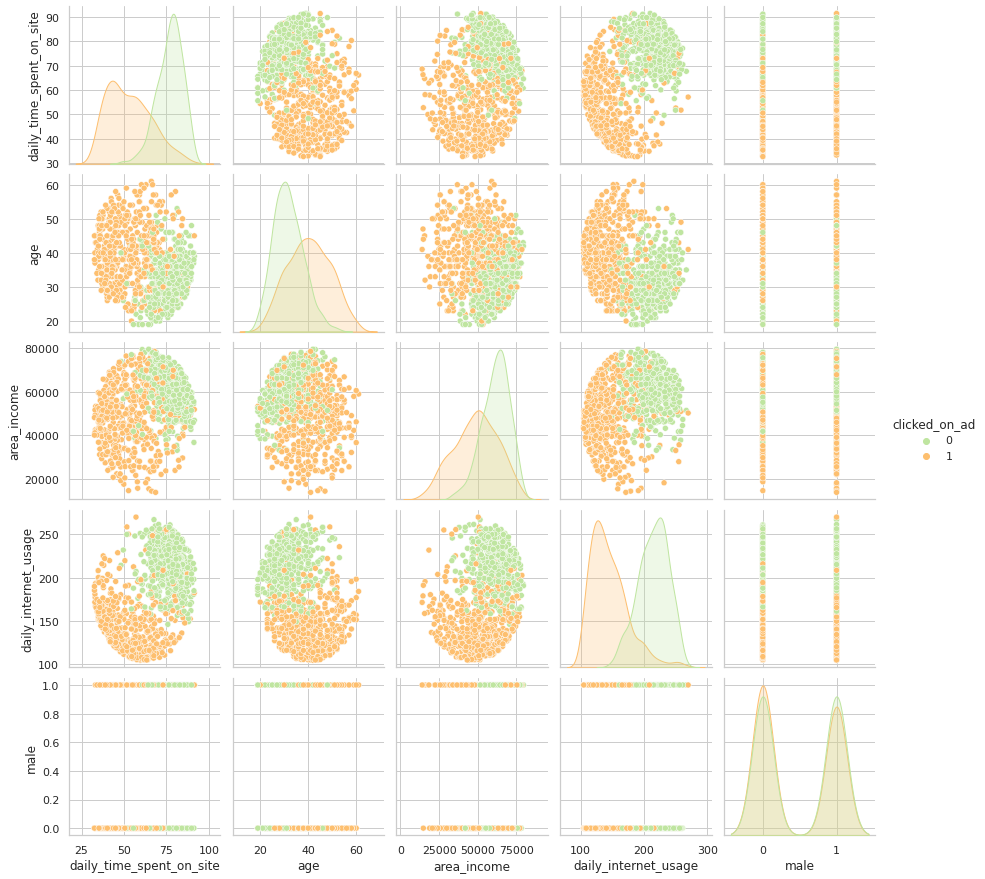

In [ ]:
sns.pairplot(ad_data,hue='clicked_on_ad',palette='Spectral_r')

In [ ]:
sexclicked=ad_data.groupby(['male'])['clicked_on_ad'].value_counts()

# instances 1male 0female , 1clicked on 0did not

In [ ]:
sexclicked

male  clicked_on_ad
0     1                269
      0                250
1     0                250
      1                231
Name: clicked_on_ad, dtype: int64

In [ ]:
#ad_data.drop([''], axis=1, inplace=True)
#dropped city and country Income status based on location could be relevant in the future
#possible querries built upon timestamp of clicking on ad also. 

In [ ]:
#ad_data.drop(['City', 'Country'], axis=1, inplace=True)

#Task 7: Perform Data-Split

1.Start of Logistic Regression



In [ ]:
ad_data.columns

Index(['daily_time_spent_on_site', 'age', 'area_income',
       'daily_internet_usage', 'ad_topic_line', 'city', 'male', 'country',
       'timestamp', 'clicked_on_ad'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#dropped 'ad_topic_line', 'city', 'country', 'timestamp'

In [ ]:
X = ad_data[['daily_time_spent_on_site', 'age', 'area_income','daily_internet_usage','male']]
y = ad_data['clicked_on_ad']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.33, random_state= 42)

#Task 8: Choose the ML Method to follow

##training using the data using a linear model 

#Task 9: train the ML Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
regressor = LogisticRegression() #instantiating(define)the model
regressor.fit(X_train,y_train) # fitting the model 

LogisticRegression()

#Task 10: Predictions Test and Model Evaluation 

In [ ]:
predictions = regressor.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



In [ ]:
print(regressor.score(X_test,y_test))
pp = regressor.predict(X_test)
print("Did Not Click on Ad", sum(pp!=0))
print("Clicked on Ad", sum(pp==0))

0.906060606060606
Did Not Click on Ad 149
Clicked on Ad 181


In [ ]:
#very accurate could have over fit the model.  but it is a ficticious data set